In [1]:
%run bernoulli.py

In [2]:
c = 4
comments = 100
list_alpha=[3,1]

In [32]:
df = generate_dirichlet_distribution_with_categories(c, comments, list_alpha)

In [33]:
df.shape

(4, 100, 2)

In [36]:
df[0][:4]

array([[0.39367759, 0.60632241],
       [0.88948002, 0.11051998],
       [0.92445644, 0.07554356],
       [0.84239115, 0.15760885]])

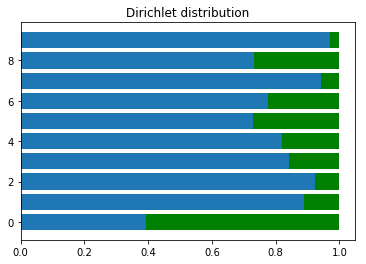

In [37]:
plot_df = plot_dirichlet_distribution_with_categories(df, size_sample=10)

In [38]:
c1, c2, c3, c4 = separate_agreed_votes_per_category(distribution=df, categories=4)

In [39]:
votes1 = np.random.random(size=(100, comments)) < c1
votes2 = np.random.random(size=(90, comments)) < c2
votes3 = np.random.random(size=(90, comments)) < c3
votes4 = np.random.random(size=(100, comments)) < c4
#votes5 = np.random.random(size=(1900, comments)) < c5
#votes6 = np.random.random(size=(2100, comments)) < c6

In [40]:
votes = np.vstack([votes1,votes2,votes3,votes4])

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2).fit_transform(votes)

In [43]:
df_pca = pd.DataFrame(pca)

In [44]:
def define_labels(category, cat):
    for c in category:
        labels.append(cat)

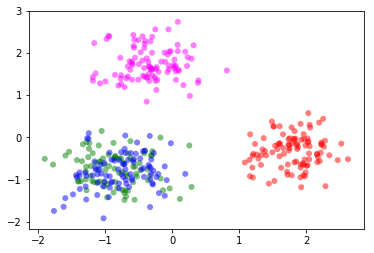

In [45]:
labels = []

define_labels(votes1,'A')
define_labels(votes2,'B')
define_labels(votes3,'C')
define_labels(votes4,'D')

label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

color_votes = [label_color_dict[label] for label in labels]

plt.scatter(x=df_pca[0], y=df_pca[1], c=color_votes, edgecolor='', alpha=0.5)

In [46]:
len([votes1,votes2])

2

In [47]:
df_ = create_column_category([votes1, votes2, votes3, votes4])

In [48]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,0,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
2,0,1,1,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,1,1,0,0,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [49]:
from sklearn.decomposition import LatentDirichletAllocation

In [50]:
lda = LatentDirichletAllocation(n_components=4,
    random_state=0)
lda.fit(df_) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [51]:
df_[:2]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,0,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1


In [101]:
x = lda.transform(df_)

In [102]:
x.shape

(380, 4)

In [103]:
x

array([[0.00354794, 0.38415175, 0.60876799, 0.00353231],
       [0.00351067, 0.29792942, 0.69502751, 0.0035324 ],
       [0.00372707, 0.38723781, 0.60531747, 0.00371766],
       ...,
       [0.00357298, 0.60118798, 0.00358997, 0.39164906],
       [0.14978955, 0.52064845, 0.00337885, 0.32618316],
       [0.00353017, 0.89315697, 0.00351549, 0.09979737]])

In [58]:
x[0]

array([0.00354794, 0.38415175, 0.60876799, 0.00353231])

In [69]:
teste = x[:6].T

In [72]:
teste.shape

(4, 6)

In [74]:
data[row]

[139361, 331509, 343164, 781380, 52269]

In [90]:
teste[0][0]+teste[1][0]+teste[2][0]+teste[3][0]

1.0

In [79]:
len(teste)

4

In [100]:
x

9

In [104]:
T = x.T

In [105]:
T.shape

(4, 380)

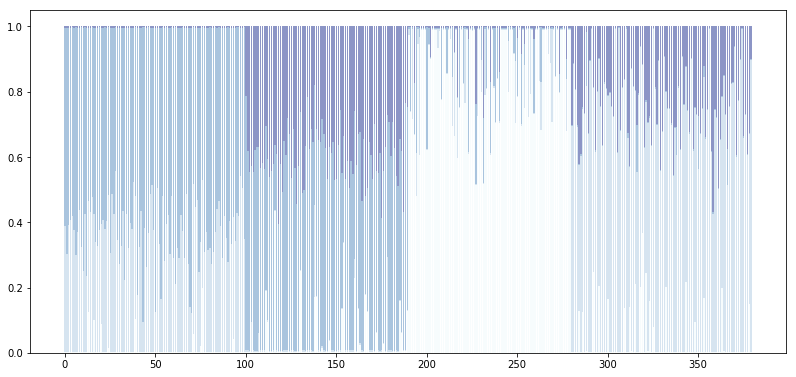

In [116]:
columns = ['%d' % x for x in range(T.shape[1])]#('1', '2', '3', '4', '5', '6')
#rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

#values = np.arange(0, 2500, 500)
#value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4)) #rows
n_rows = len(teste)

index = np.arange(len(columns)) + 0.3
bar_width = 0.7

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
plt.figure(figsize=(15,7))
cell_text = []
for row in range(n_rows):
    plt.bar(index, T[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + T[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
# the_table = plt.table(cellText=cell_text,
#                       rowLabels=4,
#                       rowColours=colors,
#                       colLabels=columns,
#                       loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)


# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
# plt.xticks([])
# plt.title('Loss by Disaster')

plt.show()

In [ ]:
columns = ('1', '2', '3', '4', '5', '6')
#rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4)) #cols
n_rows = len(teste)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, teste[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + teste[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
# the_table = plt.table(cellText=cell_text,
#                       rowLabels=4,
#                       rowColours=colors,
#                       colLabels=columns,
#                       loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
# plt.xticks([])
# plt.title('Loss by Disaster')

plt.show()

In [70]:
len(data), len(teste)

(5, 4)

In [77]:
len(rows)

5

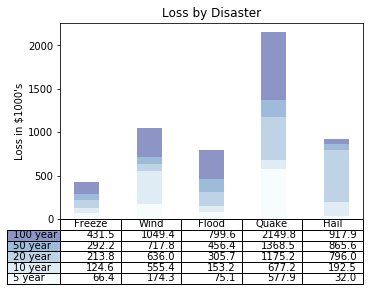

In [59]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [ ]:
df.index[99:104]

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
accs = []

In [ ]:
ncols = df.iloc[:, :-1].shape[1]

In [ ]:
#from sklearn import datasets
from sklearn import metrics
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
for i in range(1, ncols):
    print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})

In [ ]:
df_accs = pd.DataFrame.from_dict(accs)


In [ ]:
df_accs.plot.line(x='qtd', y='acc')

In [ ]:
df_accs.plot.line(x='qtd', y='acc')

In [ ]:
print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

In [ ]:
s=np.random.binomial(10,0.5,1000)
plt.hist(s,16,normed=True,color='Brown')

In [ ]:
df = np.random.dirichlet([3,1], (4, 10))

In [ ]:
df.shape

In [ ]:
c1, c2, c3, c4 = separate_agreed_votes_per_category(distribution=df, categories=4)

In [ ]:
votes1 = np.random.random(size=(10, 10)) < c1
votes2 = np.random.random(size=(9, 10)) < c2
votes3 = np.random.random(size=(10, 10)) < c3
votes4 = np.random.random(size=(8, 10)) < c4
#votes5 = np.random.random(size=(1900, comments)) < c5
#votes6 = np.random.random(size=(2100, comments)) < c6

In [ ]:
#votes1[0]

In [ ]:
votes = np.vstack([votes1,votes2,votes3,votes4])

In [ ]:
len([votes1,votes2])

In [ ]:
df = create_column_category([votes1, votes2, votes3, votes4])

In [ ]:
df.head()

In [ ]:
df.loc[df.category==1]

In [ ]:
df[4].value_counts()

In [ ]:
p_cat_1 = 10/37
p_cat_2 = 9/37
p_cat_3 = 10/37
p_cat_4 = 8/37

In [ ]:
accs = []

ncols = df.iloc[:, :-1].shape[1]

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for i in range(1, ncols):
    print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})

df_accs = pd.DataFrame.from_dict(accs)


x = df_accs.plot.line(x='qtd', y='acc')


print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

In [ ]:
import numpy as np
training = np.asarray(((1,0,1,1),
                       (1,1,0,0),
                       (1,0,2,1),
                       (0,1,1,1),
                       (0,0,0,0),
                       (0,1,2,1),
                       (0,1,2,0),
                       (1,1,1,1)));
outcome = np.asarray((0,1,1,1,0,1,0,1))

In [ ]:
import numpy as np
from collections import Counter, defaultdict
 
def occurrences(list1):
    no_of_examples = len(list1)
    prob = dict(Counter(list1))
    for key in prob.keys():
        prob[key] = prob[key] / float(no_of_examples)
    return prob
 
def naive_bayes(training, outcome, new_sample):
    classes     = np.unique(outcome)
    rows, cols  = np.shape(training)
    likelihoods = {}
    for cls in classes:
        likelihoods[cls] = defaultdict(list)
  
    class_probabilities = occurrences(outcome)
  
    for cls in classes:
        row_indices = np.where(outcome == cls)[0]
        subset      = training[row_indices, :]
        r, c        = np.shape(subset)
        for j in range(0,c):
            likelihoods[cls][j] += list(subset[:,j])
  
    for cls in classes:
        for j in range(0,cols):
             likelihoods[cls][j] = occurrences(likelihoods[cls][j])
  
  
    results = {}
    for cls in classes:
        class_probability = class_probabilities[cls]
        for i in range(0,len(new_sample)):
            relative_values = likelihoods[cls][i]
            if new_sample[i] in relative_values.keys():
                class_probability *= relative_values[new_sample[i]]
            else:
                class_probability *= 0
            results[cls] = class_probability
    print (results)

    
if __name__ == "__main__":
    training   = np.asarray(((1,0,1,1),(1,1,0,0),(1,0,2,1),(0,1,1,1),(0,0,0,0),(0,1,2,1),(0,1,2,0),(1,1,1,1)));
    outcome    = np.asarray((0,1,1,1,0,1,0,1))
    new_sample = np.asarray((1,0,1,0))
    naive_bayes(training, outcome, new_sample)

In [ ]:
# https://appliedmachinelearning.blog/2017/05/23/understanding-naive-bayes-classifier-from-scratch-python-code/

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
df

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
X, _, a, b = make_multilabel_classification(random_state=0)
lda = LatentDirichletAllocation(n_components=5,
    random_state=0)
lda.fit(X) 

# get topics for some given samples:
lda.transform(X[-2:])



In [ ]:
a= make_multilabel_classification(random_state=0)

In [ ]:
a[0].shape
#a[1].shape

In [ ]:
X[-2:].shape

In [ ]:
_[:8]

In [ ]:
X[:,:4].shape

In [ ]:
df.head()

In [ ]:
lda = LatentDirichletAllocation(n_components=4,
    random_state=0)
lda.fit(df) 

In [ ]:
df[:2]

In [ ]:
x = lda.transform(df)

In [ ]:
x[0]